출처: How to use 🐼pandas filter🎨 in survey EDA 📊
https://www.kaggle.com/corazzon/how-to-use-pandas-filter-in-survey-eda

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kaggle-survey-2020/kaggle_survey_2020_responses.csv
/kaggle/input/kaggle-survey-2020/supplementary_data/kaggle_survey_2020_methodology.pdf
/kaggle/input/kaggle-survey-2020/supplementary_data/kaggle_survey_2020_answer_choices.pdf


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

plt.style.use("seaborn-whitegrid")

In [8]:
raw = pd.read_csv(r"../input/kaggle-survey-2020/kaggle_survey_2020_responses.csv", low_memory=False)
raw.shape

(20037, 355)

In [9]:
raw.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Q1~Q6부터는 답변일 한가지라서 쉽게 가져와 사용할 수 있지만,
Q7번 부터 경우 파트의 개수가 다르기 때문에 인덱스가 다르게 되어야 한다.

iloc 는 index 값을 가져옴

In [10]:
question = raw.iloc[0]
question

Time from Start to Finish (seconds)                                Duration (in seconds)
Q1                                                           What is your age (# years)?
Q2                                                What is your gender? - Selected Choice
Q3                                             In which country do you currently reside?
Q4                                     What is the highest level of formal education ...
                                                             ...                        
Q35_B_Part_7                           In the next 2 years, do you hope to become mor...
Q35_B_Part_8                           In the next 2 years, do you hope to become mor...
Q35_B_Part_9                           In the next 2 years, do you hope to become mor...
Q35_B_Part_10                          In the next 2 years, do you hope to become mor...
Q35_B_OTHER                            In the next 2 years, do you hope to become mor...
Name: 0, Length: 355,

In [11]:
answer = raw.drop([0])
answer

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,78,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20032,126,18-21,Man,Turkey,Some college/university study without earning ...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20033,566,55-59,Woman,United Kingdom of Great Britain and Northern I...,Master’s degree,Currently not employed,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
20034,238,30-34,Man,Brazil,Master’s degree,Research Scientist,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20035,625,22-24,Man,India,Bachelor’s degree,Software Engineer,3-5 years,Python,NaN,SQL,...,Weights & Biases,NaN,NaN,TensorBoard,NaN,NaN,Trains,NaN,NaN,NaN


질문에 해당하는 0행을 제거해서 answer 값만 추출

In [12]:
answer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20036 entries, 1 to 20036
Columns: 355 entries, Time from Start to Finish (seconds) to Q35_B_OTHER
dtypes: object(355)
memory usage: 54.4+ MB


355개, 대부분 데이터가 object 데이터다

# Q1 What is your age(#years)?

In [13]:
question["Q1"]

'What is your age (# years)?'

In [18]:
answer['Q1'].value_counts(normalize=True)*100

25-29    20.018966
22-24    18.895987
18-21    17.313835
30-34    14.029746
35-39     9.937113
40-44     6.972450
45-49     4.931124
50-54     3.483729
55-59     2.051308
60-69     1.986424
70+       0.379317
Name: Q1, dtype: float64

<AxesSubplot:>

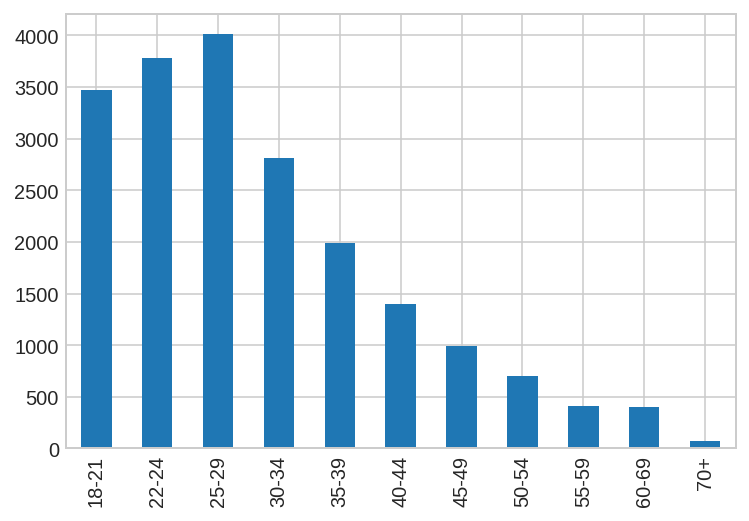

In [32]:
answer['Q1'].value_counts().sort_index().plot.bar()

* pandas의Series형태
* 빈도수세기 answer['Q1'].value_counts()
* 해당 데이터의 비율 보기 answer['Q1'].value_counts(nomalize=True)*100
* 인덱스 기준 정렬 : answer['Q1'].value_counts().sort_index()
* 시각화(판다스) : answer['Q1'].value_counts().sort_index().plot()
* 막대그래프 : answer['Q1'].value_counts().sort_index().plot.bar() (barh() 그래프를 y축으로)

Text(0.5, 1.0, 'What is your age (# years)?')

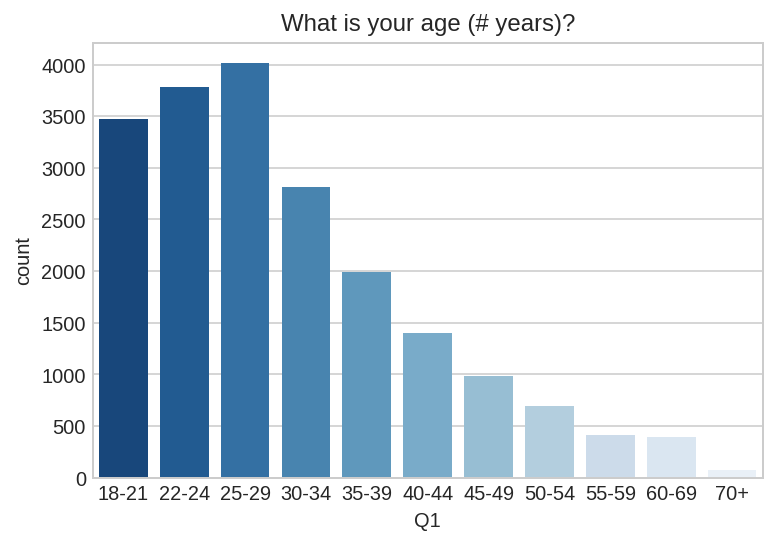

In [33]:
sns.countplot(data=answer.sort_values("Q1"), x="Q1",
              palette="Blues_r").set_title(question["Q1"])

* seaborn을 활용한 시각화 : sns.countplot(data=answer, x="Q1")
* 인덱스 순 정렬 시각화: sns.countplot(data=answer.sort_values("Q1"), x="Q1")
* tlrkrghk wnd 팔레트: palette="Blues_r" _r의 경우 빈도에 따라 그라데이션

# Q2.What is your gender - Selected Choice

In [36]:
question_no="Q2"
Q2 = answer[question_no].value_counts()
Q2

Man                        15789
Woman                       3878
Prefer not to say            263
Prefer to self-describe       54
Nonbinary                     52
Name: Q2, dtype: int64

Text(0.5, 1.0, 'What is your gender? - Selected Choice')

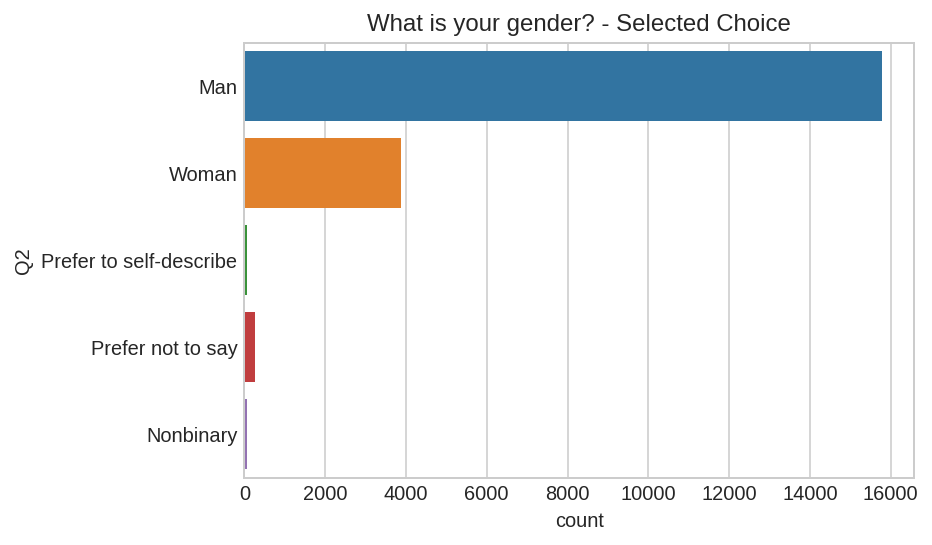

In [37]:
sns.countplot(data=answer,
             y=question_no).set_title(question[question_no])

<AxesSubplot:xlabel='Q1'>

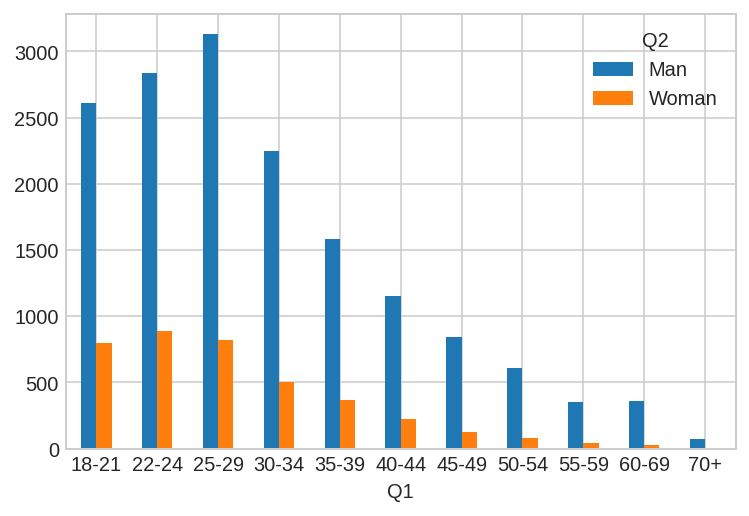

In [38]:
q1q2 = pd.crosstab(answer["Q1"], answer["Q2"])
q1q2[["Man","Woman"]].plot.bar(rot=0)

<AxesSubplot:title={'center':'Age & Gender'}, ylabel='Q1'>

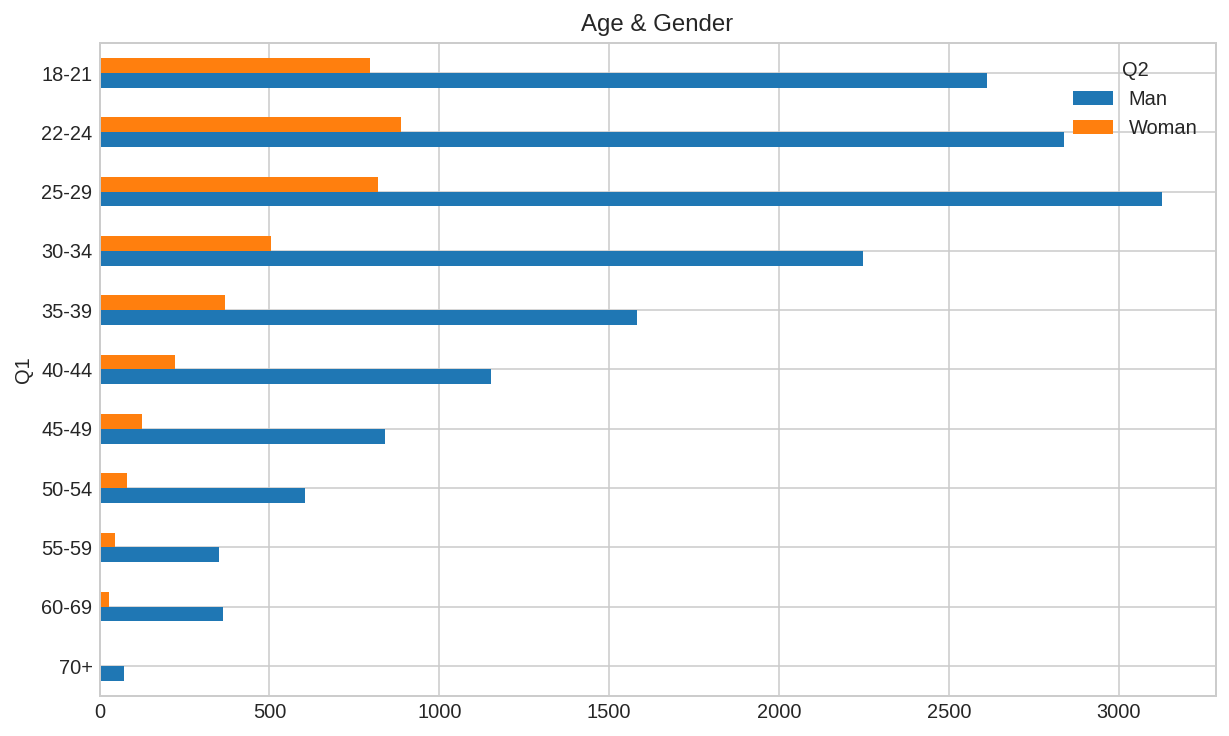

In [39]:
q1q2[["Man","Woman"]].sort_index(ascending=False).plot.barh(figsize=(10,6),
                                                           title = "Age & Gender")

Text(0.5, 1.0, 'Age & Gender')

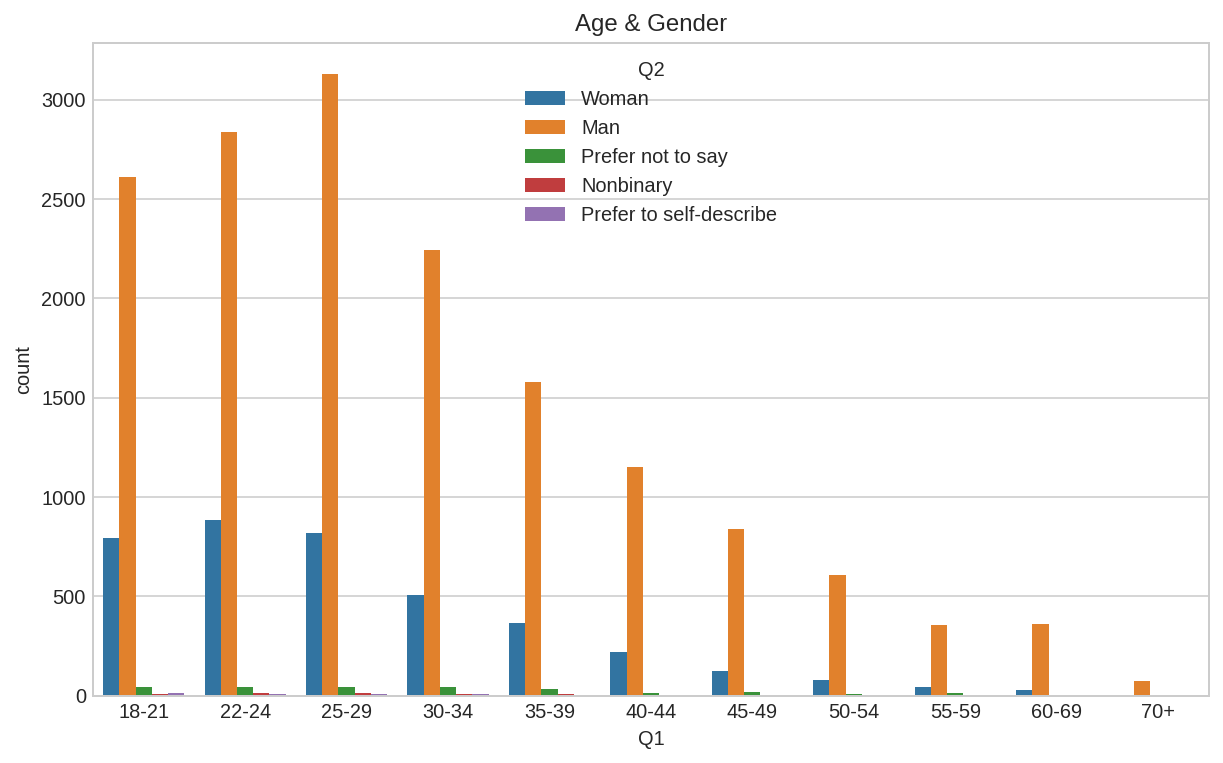

In [40]:
plt.figure(figsize=(10,6))
sns.countplot(data=answer.sort_values("Q1"), x="Q1", hue="Q2").set_title("Age & Gender")

# Q3 In which country do you currently reside?

📊 define show_countplot_by_qno

In [65]:
question["Q1"]

'What is your age (# years)?'

In [82]:
q1_cols = answer["Q1"].value_counts().sort_index().index # 변수로 지정

In [ ]:
q1_cols = answer["Q1"].value_counts().sort_index().index.tolist() #리스트로 만들기

* 응답값에 대한 빈도수 . value_counts()
* + .index() 인덱스 값만 가져옴

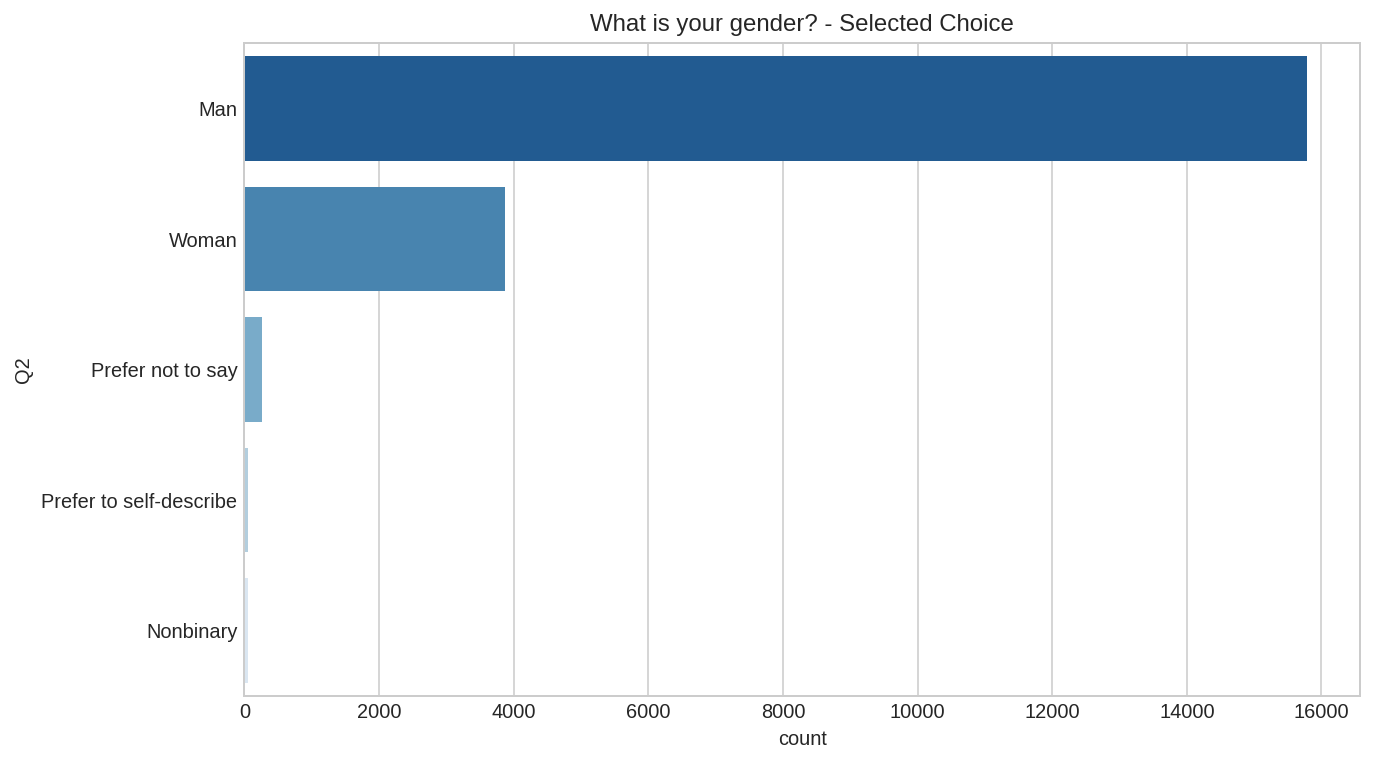

In [85]:
def show_countplot_by_qno(qno, fsize=(10,6), order = None):
    if not order: 
        order = answer[qno].value_counts().index
        
    plt.figure(figsize=fsize)  # 기본값 지정 후, 추후 함수값 조정으로 그래프 사이즈 조정
    sns.countplot(data=answer, y=qno, 
                  order=order, palette ="Blues_r"
                 ).set_title(question[qno])

show_countplot_by_qno("Q2")

In [ ]:
def show_countplot_by_qno(qno, fsize=(10,6), order= None):
    """
    qno : question_no, ex)Q12
    fsize : figsize default (10, 6)
    order : optional order list, default value_counts().index
    """
    if not order :  # order가 없으면 빈도값을 기준으로 빈도수가 높은 인덱스 순으로 정렬
        order = answer[qno].values_counts().index
    
    plt.figure(figsize=fsize)
    sns.countplot(data=answer,
                 y=qno
                 order=order,
                 palette ="Blues_r"
                 ).set_title(question(qno))

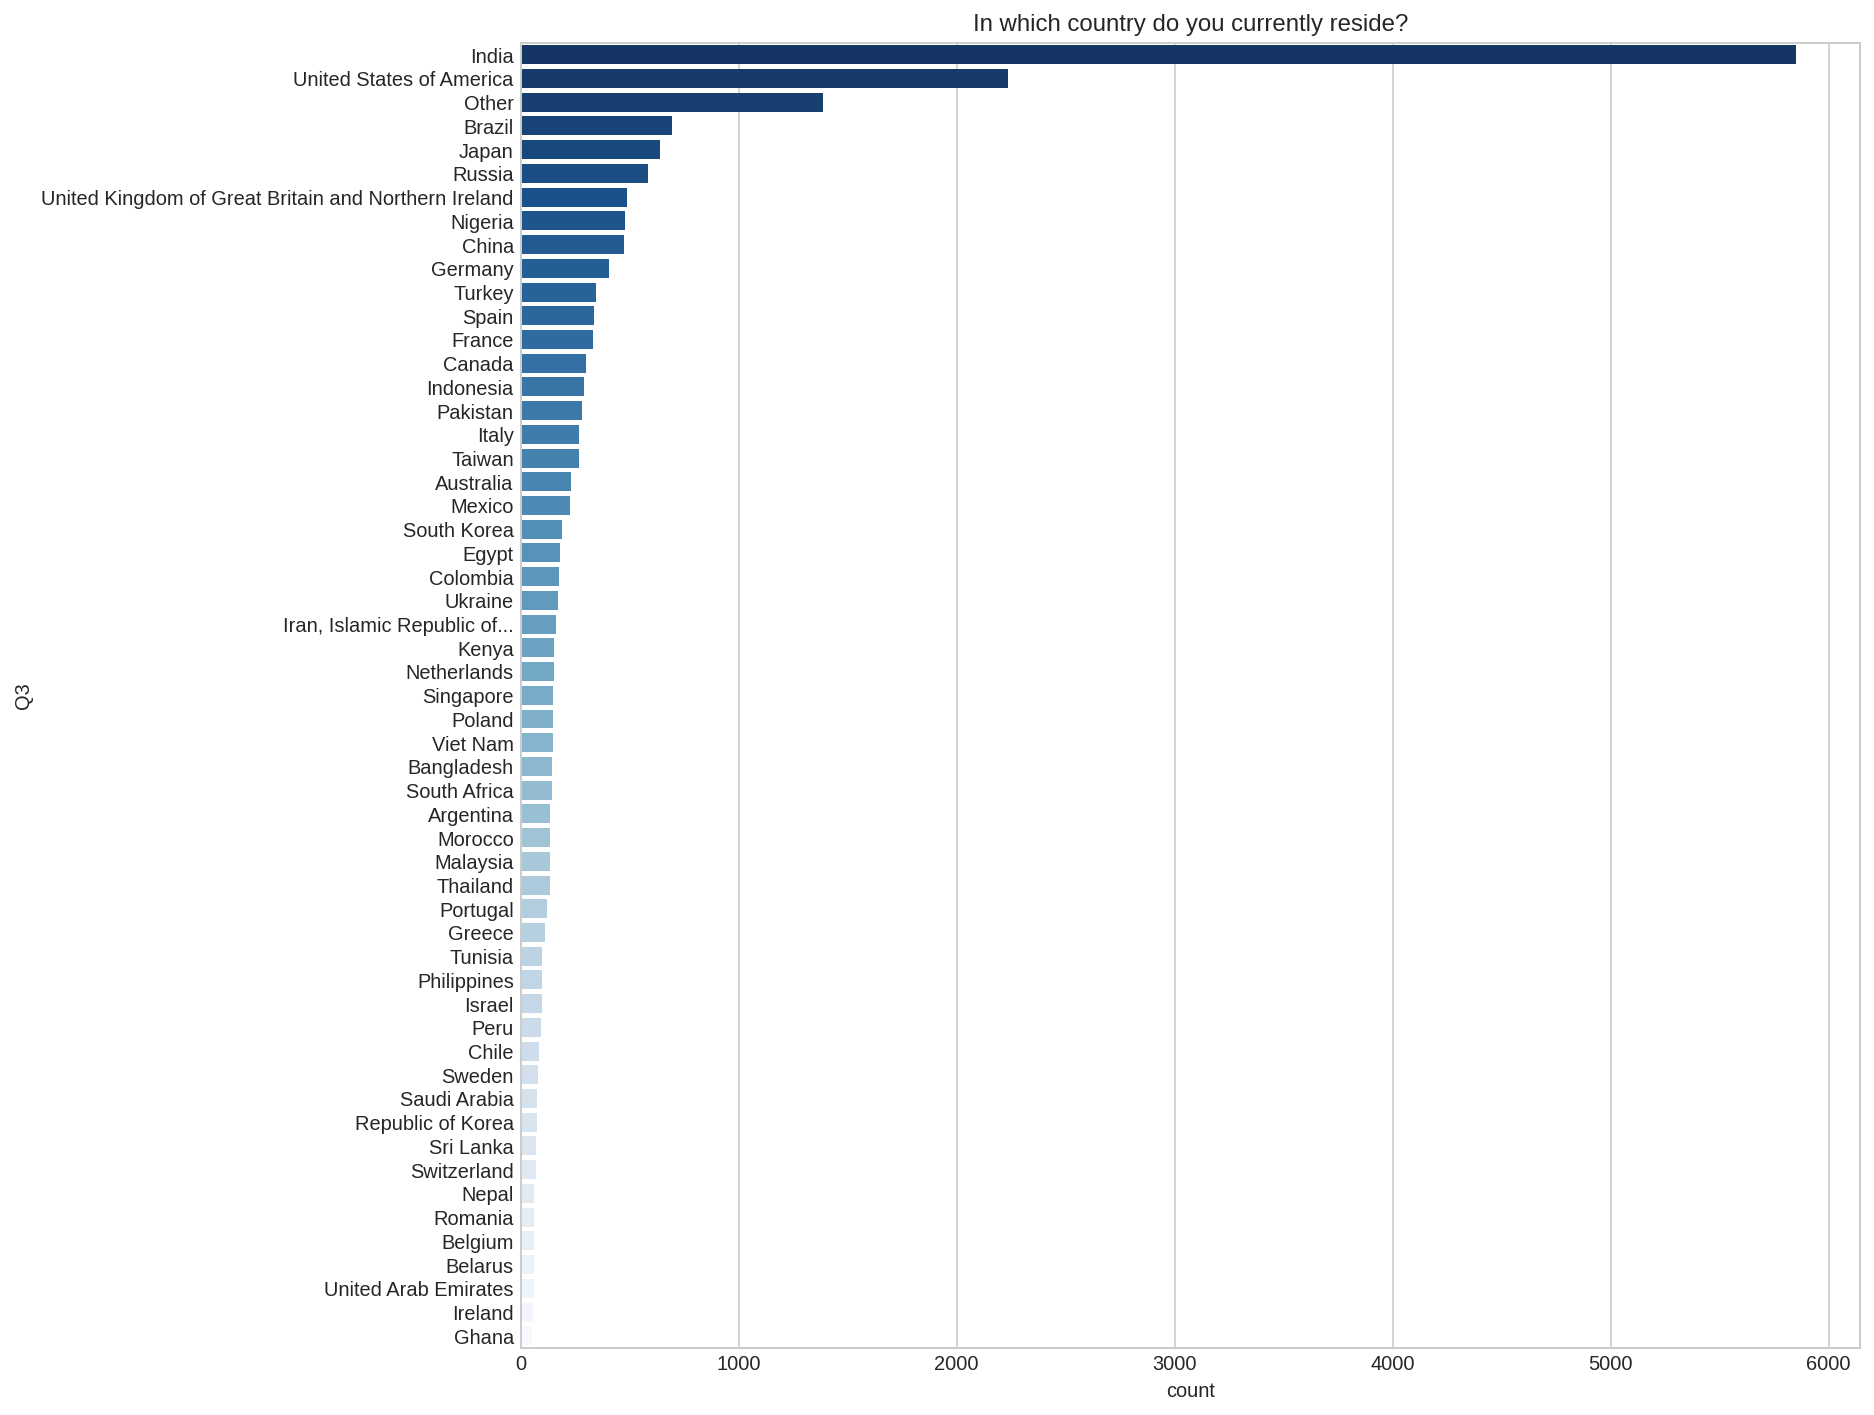

In [86]:
show_countplot_by_qno("Q3", fsize=(12,12))

## Q4 What is the highest level of formal education that you have attained or plan to attain within the next 2 years?

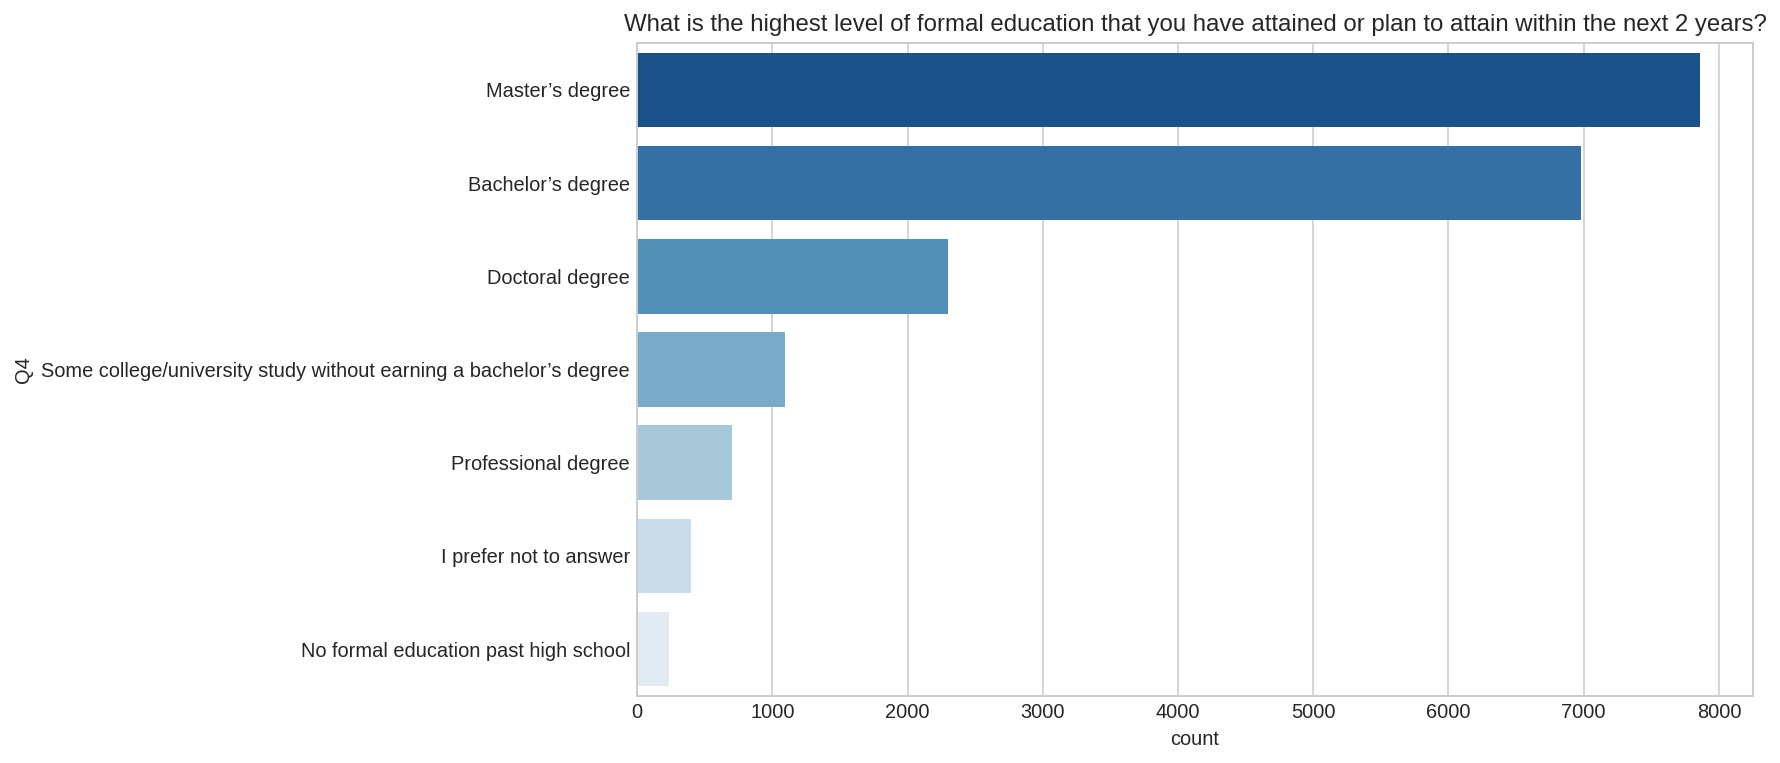

In [88]:
show_countplot_by_qno("Q4")

## Q5 Select the title most similar to your current role(or most recent title if retired):

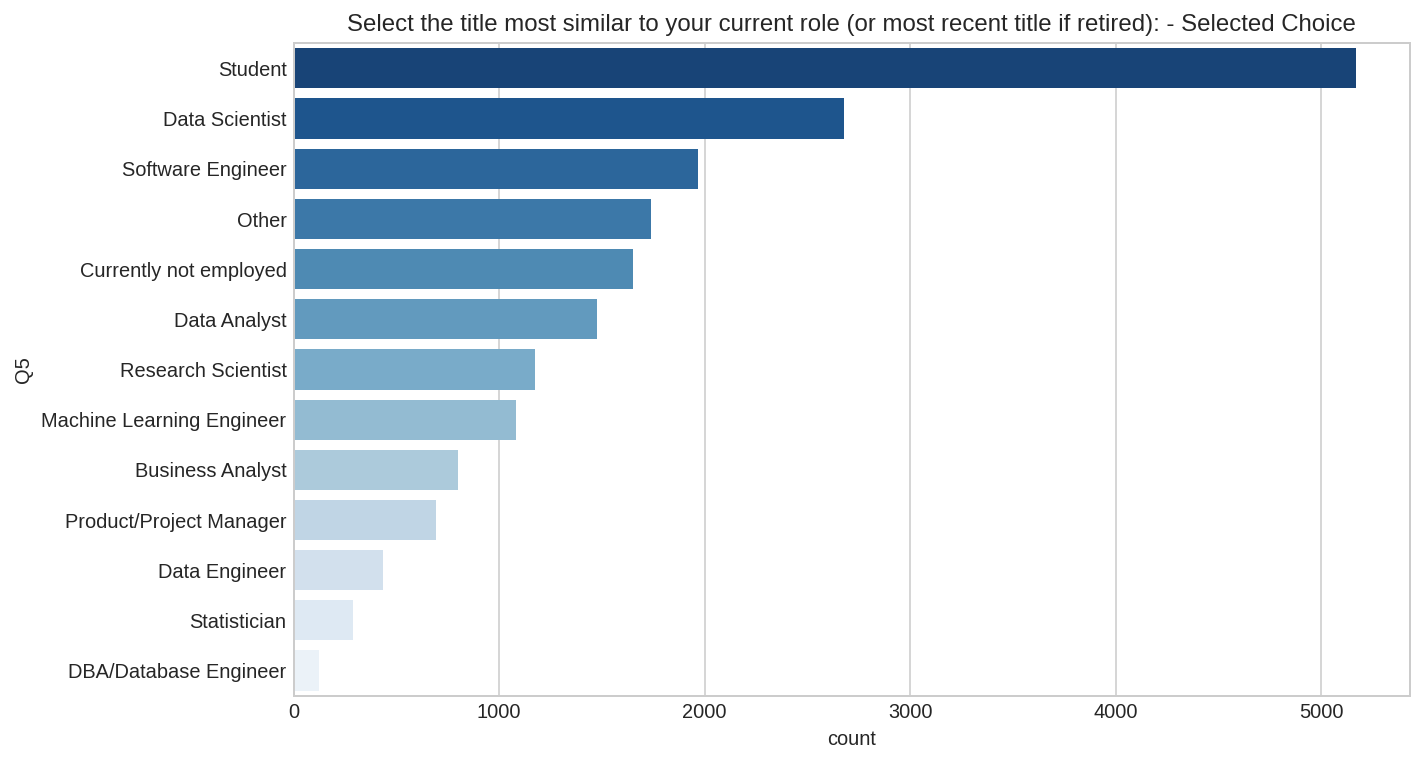

In [89]:
show_countplot_by_qno("Q5")

## Q6 For how many years have you been writing code and/or programming?

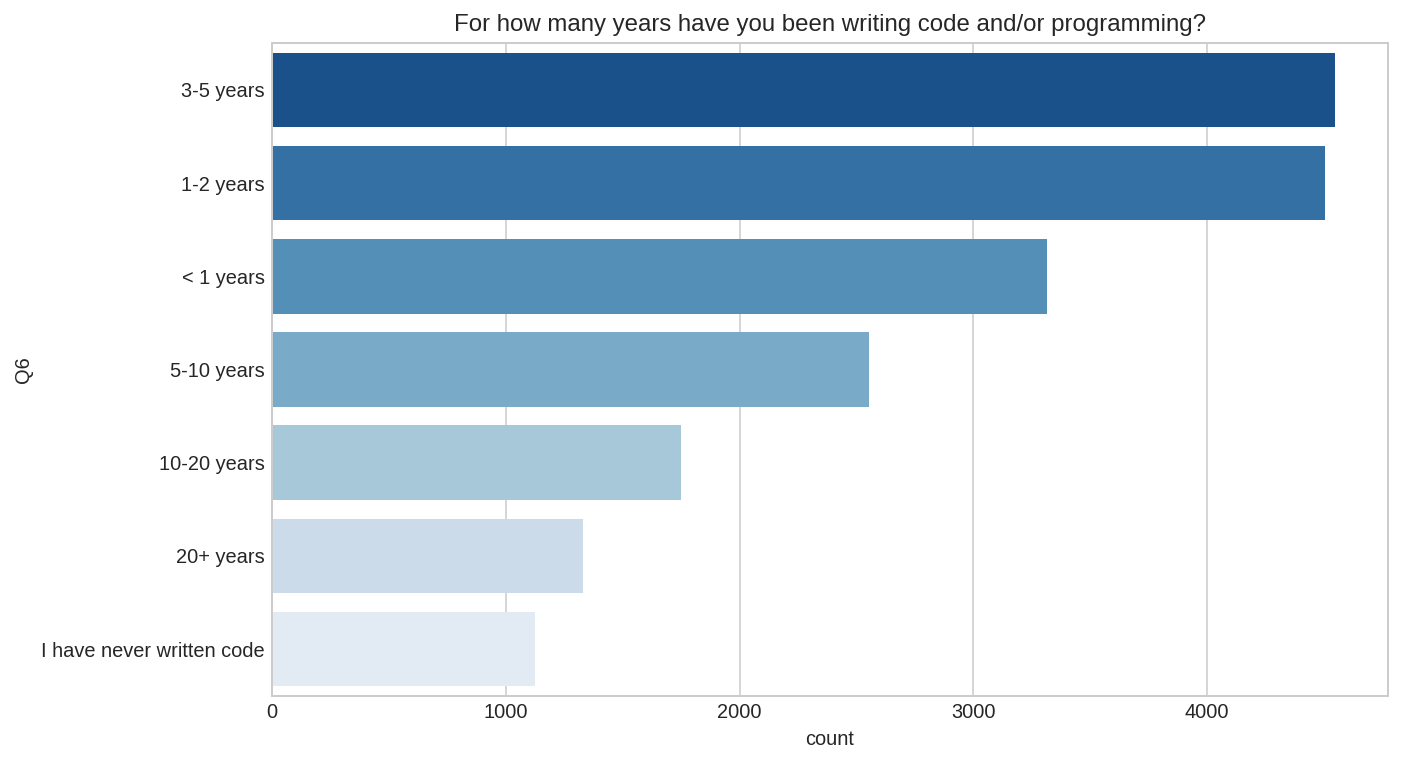

In [90]:
show_countplot_by_qno("Q6")

In [95]:
q6_cols = ['I have never written code','< 1years','1-2 years','3-5 years','5-10 years',
          '10-20 years','20+ years']

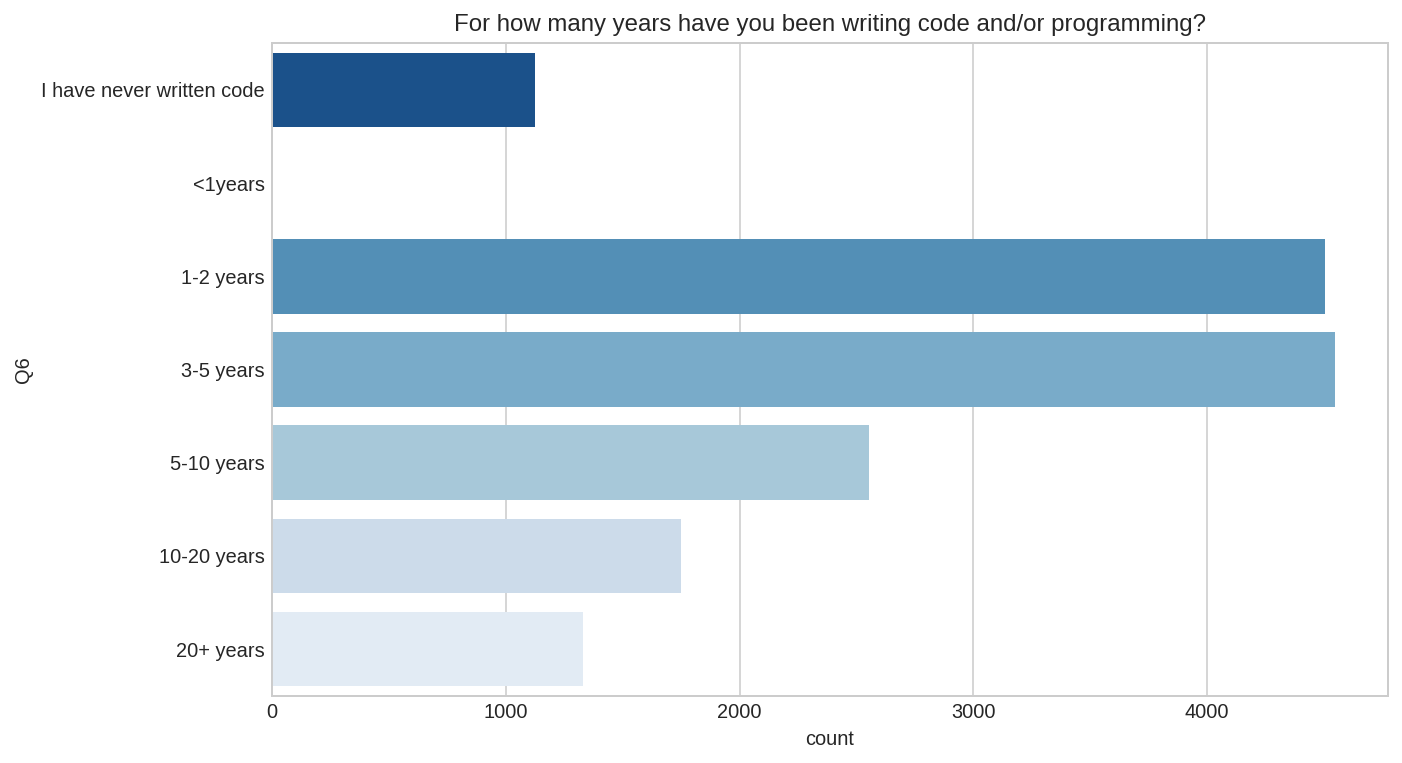

In [93]:
show_countplot_by_qno("Q6", order=q6_cols)

## Q7 What programming languages do you use on a regular basis?(select all that apply)

🐼 pandas filter & describe

In [96]:
question.filter(regex = "Q7")[0].split("-")[0]

'What programming languages do you use on a regular basis? (Select all that apply) '

In [97]:
answer_Q7 = answer.filter(regex= "Q7")
answer_Q7

,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER
1,Python,R,SQL,C,NaN,NaN,Javascript,NaN,NaN,NaN,MATLAB,NaN,Other
2,Python,R,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,Java,Javascript,NaN,NaN,Bash,NaN,NaN,NaN
4,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,Bash,NaN,NaN,NaN
5,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20033,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20034,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20035,Python,NaN,SQL,C,NaN,Java,Javascript,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
answer_Q7_desc = answer_Q7.describe()
answer_Q7_desc

,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER
count,15530,4277,7535,3315,3827,3367,2995,262,198,1776,2217,206,1945
unique,1,1,1,1,1,1,1,1,1,1,1,1,1
top,Python,R,SQL,C,C++,Java,Javascript,Julia,Swift,Bash,MATLAB,None,Other
freq,15530,4277,7535,3315,3827,3367,2995,262,198,1776,2217,206,1945


In [102]:
answer_Q7_count = answer_Q7_desc.loc[["top","count"]].T
answer_Q7_count = answer_Q7_count.set_index("top")
answer_Q7_count = answer_Q7_count.sort_values("count", ascending=False)
answer_Q7_count

,count
top,
Python,15530
SQL,7535
R,4277
C++,3827
Java,3367
C,3315
Javascript,2995
MATLAB,2217
Other,1945


How to get title in mutiple choice question

In [103]:
q7_title = question.filter(regex="Q7")[0].split("-")[0]

Text(0.5, 1.0, 'What programming languages do you use on a regular basis? (Select all that apply) ')

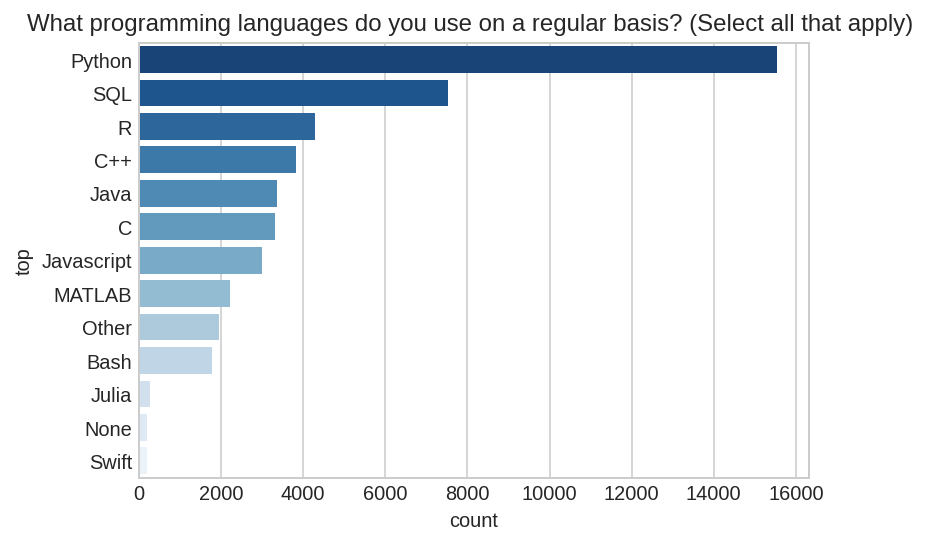

In [104]:
sns.barplot(data=answer_Q7_count,
           y=answer_Q7_count.index, x="count", palette="Blues_r").set_title(q7_title)

### define get_question_title function

In [ ]:
def get_question_title_by_qno(qno):
    if qno in question.index:
        return question[qno]
    else:
        q_no = question.filter(regex=qno)[0].split("-")[0]
        return q_no

get_question_title_by_qno("Q7")